In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv("~/datacsv/Churn_Modelling.csv")
#data = pd.read_csv("~/datacsv/cchurn1.csv")

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.shape

(10000, 14)

In [6]:
#data.isnull().sum()

In [7]:
#data1=data.dropna()

In [8]:
x = data.iloc[:,[3,6,7,8,9,10,11,12]].values
y=data.iloc[:,13].values

In [9]:
x

array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 4.1000000e+01, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 4.2000000e+01, 8.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 3.6000000e+01, 7.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 4.2000000e+01, 3.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 2.8000000e+01, 4.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [10]:
x.shape

(10000, 8)

In [11]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [12]:
# splitting the training & test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2)

In [13]:
x_train.shape ,x_test.shape, y_train.shape ,y_test.shape

((8000, 8), (2000, 8), (8000,), (2000,))

In [14]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
x_train1 = mc.fit_transform( x_train)
X_test1 = mc.fit_transform( x_test)

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [16]:
# Initialize the model
model=Sequential()

# Build input layer 
model.add(Dense(units=32, activation='relu', input_dim=8))

In [17]:
# Building hidden layer
model.add(Dense(units=16,activation ='relu'))

In [18]:
# Building hidden layer
model.add(Dense(units=8,activation ='relu'))

In [19]:
#Adding outer layer
model.add(Dense(units=1, activation='sigmoid'))

In [20]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [21]:
#model.fit(x_train, y_train, epochs=50, batch_size=1,verbose=1)

from tensorflow.keras.callbacks import EarlyStopping
early_stopping_minitor = EarlyStopping(patience=100)

#train model:   
history = model.fit(x_train, y_train,
 epochs=150,
 batch_size=10,
 #validation_split=0.2,
 callbacks=[early_stopping_minitor])

Epoch 1/150
800/800 [==============================] - 1s 707us/step - loss: 107.0858 - accuracy: 0.6768
Epoch 2/150
800/800 [==============================] - 1s 695us/step - loss: 24.3242 - accuracy: 0.6802
Epoch 3/150
800/800 [==============================] - 1s 693us/step - loss: 10.2470 - accuracy: 0.6817
Epoch 4/150
800/800 [==============================] - 1s 694us/step - loss: 7.4526 - accuracy: 0.6821
Epoch 5/150
800/800 [==============================] - 1s 689us/step - loss: 5.4825 - accuracy: 0.6825
Epoch 6/150
800/800 [==============================] - 1s 689us/step - loss: 4.3066 - accuracy: 0.6798
Epoch 7/150
800/800 [==============================] - 1s 687us/step - loss: 1.5741 - accuracy: 0.7041
Epoch 8/150
800/800 [==============================] - 1s 688us/step - loss: 1.3706 - accuracy: 0.7081
Epoch 9/150
800/800 [==============================] - 1s 691us/step - loss: 1.2409 - accuracy: 0.6980
Epoch 10/150
800/800 [==============================] - 1s 690us/step

In [22]:
# fit model 
#model.fit(x_train,y_train,epochs=150)

In [23]:
y_pred = model.predict(x_test)


63/63 [==============================] - 0s 526us/step


In [24]:
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [25]:
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)
accuracy_score(y_test, y_pred)

[[1593    0]
 [ 407    0]]


0.7965

In [26]:
print('Test accuracy:', accuracy_score(y_test, y_pred))

Test accuracy: 0.7965


dict_keys(['loss', 'accuracy'])


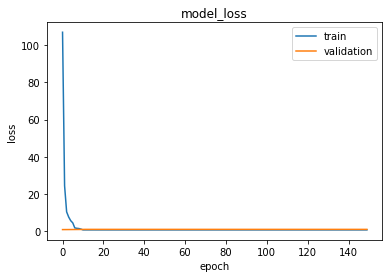

In [27]:
# Plot loss of train and test set
print(history.history.keys())

#Loss in train and test:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()